In [41]:
import numpy as np

arr1 = np.array([2,3,4])
print(arr1)
print(arr1.dtype)

arr2 = np.array([1.1, 1.2, 1.3])
print(arr2)
print(arr2.dtype)

[2 3 4]
int32
[ 1.1  1.2  1.3]
float64


In [42]:
print(arr1+arr2) #所有元素都进行操作
print(arr2*10)

[ 3.1  4.2  5.3]
[ 11.  12.  13.]


In [43]:
data = ([1,2,3], [4,5,6])
print(data)
arr3 = np.array(data)
print(arr3)
print(arr3.dtype)

([1, 2, 3], [4, 5, 6])
[[1 2 3]
 [4 5 6]]
int32


In [44]:
print(np.zeros((3,5)))
print(np.ones((4,6)))
print(np.empty((2,3,4)))

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[[ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]
[[[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]]


##numpy的索引与切片操作

In [45]:
arr4 = np.arange(10)
arr4[2:6] = 10
print(arr4)

arr_slice =arr4[2:6].copy()
arr_slice[:] = 15
print(arr_slice)
print(arr4)

[ 0  1 10 10 10 10  6  7  8  9]
[15 15 15 15]
[ 0  1 10 10 10 10  6  7  8  9]


## pandas 和 Series

In [46]:
from pandas import Series, DataFrame
import pandas as pd

obj = Series([4, 5, 6, -7])
print(obj)

0    4
1    5
2    6
3   -7
dtype: int64


In [47]:
print(obj.index)
print(obj.values)

RangeIndex(start=0, stop=4, step=1)
[ 4  5  6 -7]


In [48]:
obj2 = Series([4, 5, 6, -7], index=['d', 'b','c','a'])
print(obj2)

d    4
b    5
c    6
a   -7
dtype: int64


In [49]:
obj2['c'] = 69
print(obj2)

d     4
b     5
c    69
a    -7
dtype: int64


In [50]:
sdata = {'beijing':35000, 'shanghai':71000, 'guangzhou': 16000, 'shenzhen':5000}
obj3 = Series(sdata)
print(obj3)
obj3.index=['bj','sh','gz','sz']
print(obj3)

beijing      35000
guangzhou    16000
shanghai     71000
shenzhen      5000
dtype: int64
bj    35000
sh    16000
gz    71000
sz     5000
dtype: int64


## DataFrame基本操作

In [51]:
data = {
    'city':['shanghai', 'beijing','shenzhen', 'guangzhou'],
    'year':[2016, 2017, 2018, 2019],
    'pop':[1.5, 1.6, 1.9, 1.99]
}

df =DataFrame(data)
df2 = DataFrame(data, columns=['year', 'city', 'pop'])
print(df)
print(df2)
print(df2['city'])
print(df2.pop)
df2['new'] = 100
print(df2)

df2['cap'] = df2.city == 'beijing'
print(df2)

        city   pop  year
0   shanghai  1.50  2016
1    beijing  1.60  2017
2   shenzhen  1.90  2018
3  guangzhou  1.99  2019
   year       city   pop
0  2016   shanghai  1.50
1  2017    beijing  1.60
2  2018   shenzhen  1.90
3  2019  guangzhou  1.99
0     shanghai
1      beijing
2     shenzhen
3    guangzhou
Name: city, dtype: object
<bound method NDFrame.pop of    year       city   pop
0  2016   shanghai  1.50
1  2017    beijing  1.60
2  2018   shenzhen  1.90
3  2019  guangzhou  1.99>
   year       city   pop  new
0  2016   shanghai  1.50  100
1  2017    beijing  1.60  100
2  2018   shenzhen  1.90  100
3  2019  guangzhou  1.99  100
   year       city   pop  new    cap
0  2016   shanghai  1.50  100  False
1  2017    beijing  1.60  100   True
2  2018   shenzhen  1.90  100  False
3  2019  guangzhou  1.99  100  False


In [52]:
pop = {'beijing':{2008:1.5, 2009:2.0},
        'shanghai':{2008:2.0, 2009:3.6}}
df3 = DataFrame(pop)

print(df3)
print(df3.T)

      beijing  shanghai
2008      1.5       2.0
2009      2.0       3.6
          2008  2009
beijing    1.5   2.0
shanghai   2.0   3.6


In [53]:
obj4 = Series([4.5, 7.2, -5.3, 3.6], index=['b', 'd', 'c', 'a'])
print(obj4)
obj5 = obj4.reindex(['a', 'b','c', 'd', 'e'], fill_value=0)
print(obj5)

b    4.5
d    7.2
c   -5.3
a    3.6
dtype: float64
a    3.6
b    4.5
c   -5.3
d    7.2
e    0.0
dtype: float64


In [54]:
obj6 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
print( obj6.reindex(range(6), method='ffill' ))

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


In [55]:
from numpy import nan as NA

data = Series([1, NA, 2])
print( data.dropna() )

0    1.0
2    2.0
dtype: float64


In [56]:
data2 = DataFrame( [[1., 6.5, 3], [1., NA, NA], [NA, NA, NA]] )
data2[4] = NA
print(data2)
print()
print(data2.dropna(axis=0, how='all'))
print()
print(data2.dropna(axis=1, how='all'))

     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN

     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN


In [57]:
#data2.fillna(0)
data2.fillna(0, inplace=True)
print(data2)

     0    1    2    4
0  1.0  6.5  3.0  0.0
1  1.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0


## 层次化索引

In [58]:
import  numpy as np
data3 = Series(np.random.randn(10),
              index=[['a', 'a','a', 'b', 'b', 'b','c','c','d','d'],
                     [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
print( data3.unstack().stack() )

a  1   -1.070971
   2    0.479006
   3    1.309162
b  1   -0.679965
   2    1.123156
   3    0.232347
c  1    0.434155
   2    1.472252
d  2    0.839045
   3   -1.206248
dtype: float64


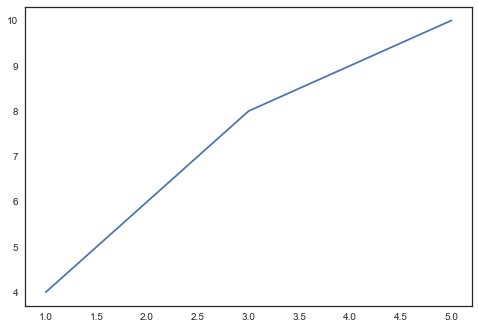

In [59]:
import matplotlib.pyplot as plt

plt.plot([1, 3, 5], [4, 8, 10])
plt.show()

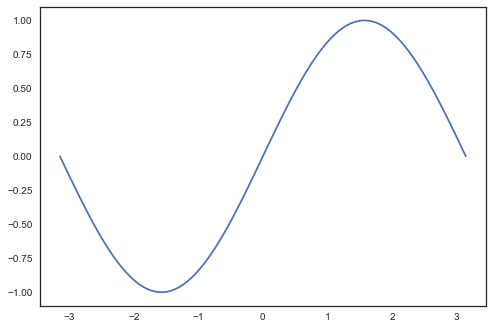

In [60]:
import numpy as np
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.sin(x))
plt.show()

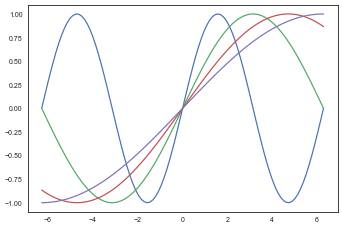

In [61]:
x = np.linspace( -np.pi*2, np.pi*2, 100)
plt.figure(1, dpi=50)
for i in range(1, 5):
    plt.plot(x, np.sin(x/i))
plt.show()

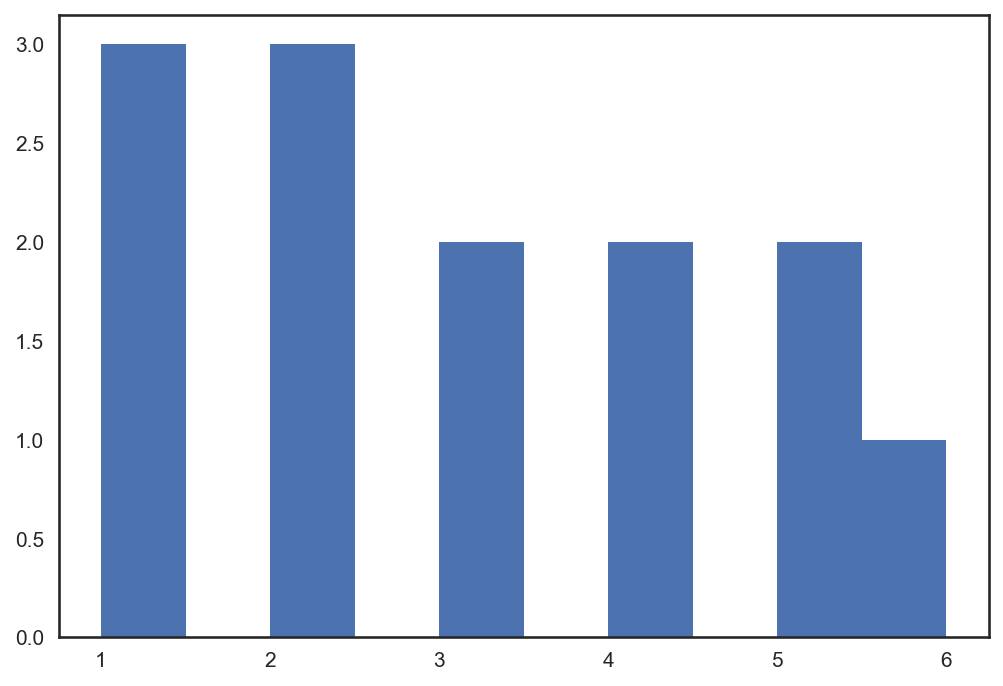

In [62]:
plt.figure(1, dpi=150) #创建图表1， dpi代表图片精细度，dpi越大文件越大，杂志要300以上
data = [1, 1, 1, 2, 2, 2, 3 ,3 ,4, 5, 5, 6 , 4]
plt.hist(data)#只要传入数据， 直方图就会统计数据出现的次数
plt.show()

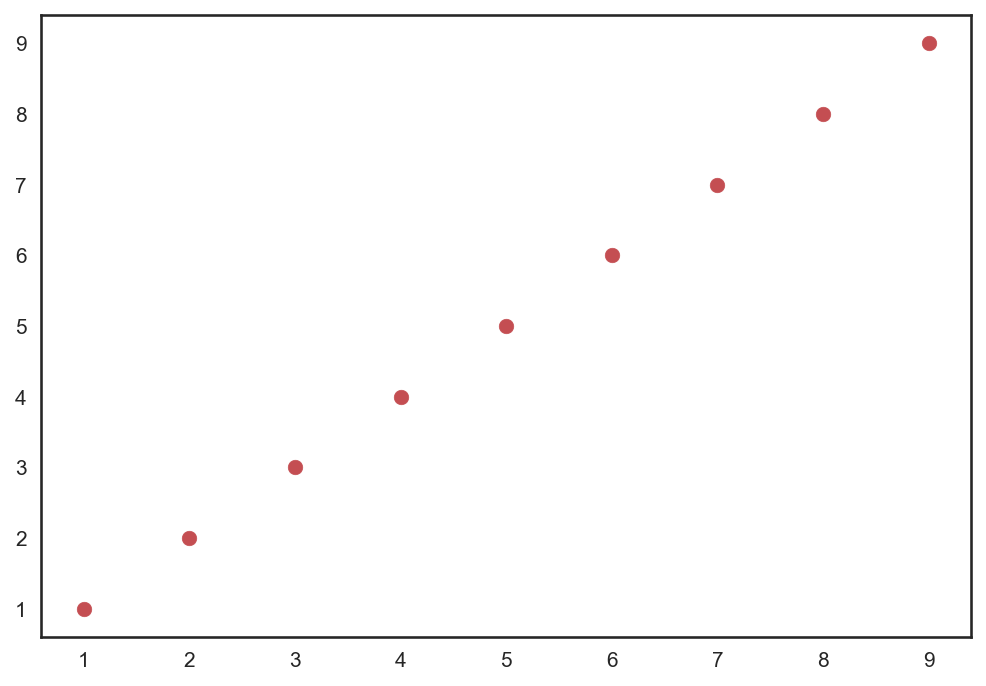

In [63]:
x = np.arange(1, 10)
y = x
plt.figure(2, dpi=150)
plt.scatter(x, y, c='r', marker='o')#c='r'表示散点的颜色为红色， marker表示指定散点形状为圆形
plt.show()

   120    4  setosa  versicolor  virginica
0  6.4  2.8     5.6         2.2          2
1  5.0  2.3     3.3         1.0          1
2  4.9  2.5     4.5         1.7          2
3  4.9  3.1     1.5         0.1          0
4  5.7  3.8     1.7         0.3          0


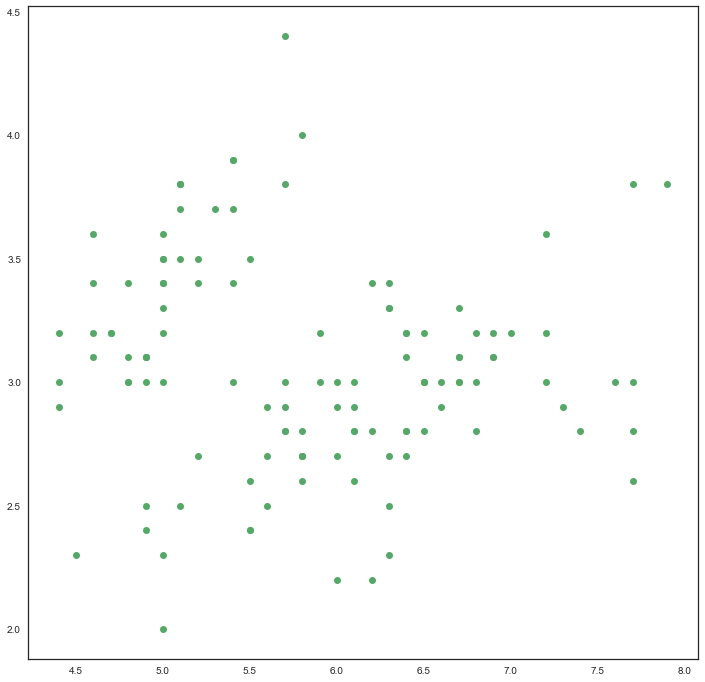

In [64]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(12,12))
iris = pd.read_csv("./iris_training.csv")
print( iris.head() )

#绘制散点图
plt.plot(iris["120"], iris["4"], 'go')
#plt.scatter(x, y, c='r', marker='o')#c='r'表示散点的颜色为红色， marker表示指定散点形状为圆形

plt.show()

## 绘图更漂亮的工具， seaborn

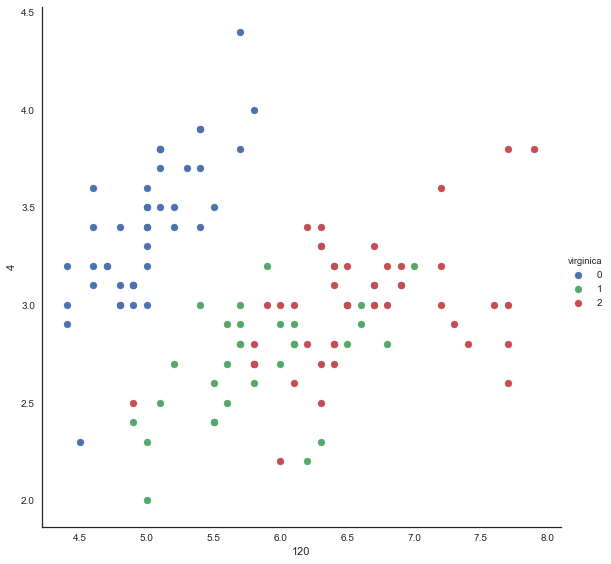

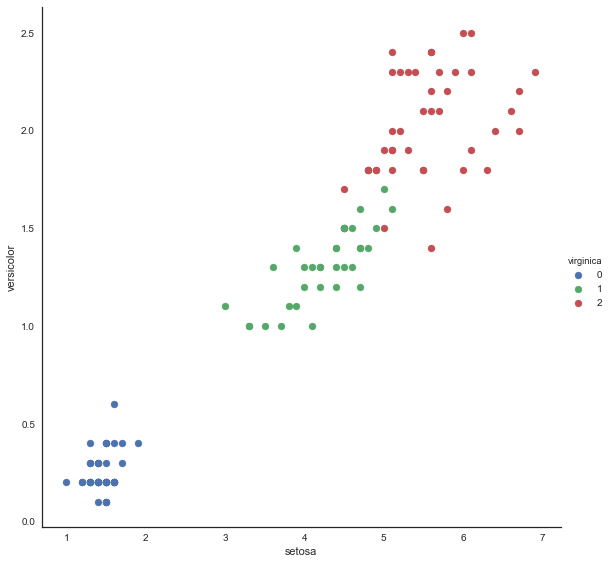

In [65]:
import seaborn as sns
import warnings

sns.set(style='white', color_codes=True)
sns.FacetGrid(iris, hue='virginica', size=8).map(plt.scatter, "120", "4").add_legend()

sns.FacetGrid(iris, hue='virginica', size=8).map(plt.scatter, "setosa", "versicolor").add_legend()
plt.show()